#### Several "Los Pollos Hermanos" vans, carrying large quantities of methamphetamine (meth), were attacked by a drug cartel 10 times in an area in New Mexico. The DEA thinks the meth lab is at the centroid of this area.

*    Randomly generate the attacks’ points in New Mexico
*    Compute the smallest polygon that contains all the points corresponding to the attacks
*    Create a GeometryCollection that contains New Mexico, the polygon, and the points within it
*    Visualize the collection and the centroid in folium (use markers for points, color the centroid differently)


In [27]:
import geopandas as gpd
import seaborn as sns
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import folium

from geopandas import GeoSeries
from shapely.geometry import Point,Polygon
from shapely.geometry import MultiPoint
from shapely.geometry.collection import GeometryCollection

<AxesSubplot: >

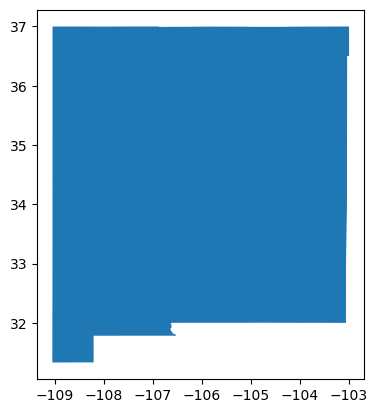

In [37]:
# file inside https://geodata.ucdavis.edu/gadm/gadm4.1/shp/gadm41_USA_shp.zip

america = gpd.read_file("C:/Users/daddu/OneDrive/Desktop/MAGISTRALE/2° ANNO/GEOSPATIAL/HOMEWORKS/Files/gadm41_USA_shp/gadm41_USA_1.shp")
new_messico = america[america["NAME_1"] == "New Mexico"]
new_messico.plot()

In [29]:
new_messico.bounds

,minx,miny,maxx,maxy
31,-109.050102,31.332155,-103.000656,36.99942


In [30]:
def Random_Points_in_Poly(poly, n):
    points = []
    min_x, min_y, max_x, max_y = poly.bounds
    while len(points) < n:
        pnt = Point([random.uniform(min_x, max_x), random.uniform(min_y, max_y)])
        if poly.contains(pnt):
            points.append(Point(pnt.y,pnt.x))
    return points


#Func to swap coordinates in convex hull later on
def swap_polygon_xy(poly):
    lista = [el.strip("(") for el in poly.wkt.split()]
    res = []

    for elemento in lista:
        elemento = elemento.replace(",",".")
        res.append(elemento.rstrip(".),"))

    final = []
    for i in range(1,len(res),2):
        res[i], res[i+1] = res[i+1], res[i]
        final.append((float(res[i]),float(res[i+1])))

    return Polygon(final) #returns the polygon obj

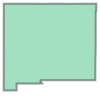

In [31]:
new_messio_geom = new_messico.geometry.values[0]
new_messio_geom

In [32]:
# MultiPoint obj with 10 pts inside
multi_point = MultiPoint(Random_Points_in_Poly(new_messio_geom,10))

#Convex Hull, both normal and reversed for plot purposes
area_attack = multi_point.convex_hull
area_attack_reverse = swap_polygon_xy(area_attack)

#Area Centroid
centroid = area_attack.centroid

#Collection ofr objs
collezione = GeometryCollection([multi_point,area_attack_reverse,centroid])

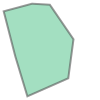

In [33]:
area_attack

In [34]:
m = folium.Map(location=[34.307144, -106.018066], zoom_start=5.5)

#Adding markers (borders)
for i in range(10):
    folium.Marker(
    location=[multi_point.geoms[i].x, multi_point.geoms[i].y],
    popup= f"Atk Location #{i}",
    icon=folium.Icon(color="green", 
                     icon="glyphicon-warning-sign"),
).add_to(m)

#Adding Centroid
folium.Marker(location = [centroid.x, centroid.y],
    popup= "Meth Lab!",
    icon=folium.Icon(color="red", 
                     icon='glyphicon-flash')).add_to(m)
#Adding area
folium.GeoJson(area_attack_reverse).add_to(m)
m